# Heat Maps & Market Maps

We'll build off our use of `bqplot` to make a dashboard with randomly sampled data last lecture to make interactive dashboards out of "real" data using the `UFO Dataset`.

We'll also look at the `Market Map` marks in `bqplot` for another representation of mappable data in a dashboard.

Let's import our usual stuff:

In [15]:
import pandas as pd
import bqplot
import numpy as np
import traitlets
import ipywidgets
import matplotlib.pyplot as plt
%matplotlib inline

## Dashboarding with "real" data using the UFO dataset

Let's read in the UFO dataset:

In [2]:
ufos = pd.read_csv("/Users/jillnaiman/Downloads/ufo-scrubbed-geocoded-time-standardized-00.csv",
                  names = ["date", "city", "state", "country",
                          "shape", "duration_seconds", "duration",
                          "comment", "report_date", 
                           "latitude", "longitude"],
                  parse_dates = ["date", "report_date"])

### Aside: downsampling

We have covered downsampling before, but we will repeat it here in case folks have slower computers and don't want to use the full dataset while in class.

We can remind ourselves of how many entries are in this dataset:

In [3]:
len(ufos)

80332

80,000 entries is a lot!  So, to speed up our interactivity, we can randomly sample this dataset for plotting purposes.  Lets down sample to 1000 samples:

In [5]:
nsamples = 1000
#nsamples = 5000 # if you want a larger sample
downSampleMask = np.random.choice(range(len(ufos)-1), 
                                  nsamples, replace=False)
downSampleMask
# so, downsample mask is now a list of random indicies for 
#  the UFO dataset.  Your's will not be the same because we have not set a seed.

array([70752, 66128, 65793, 19456, 30991, 27136, 74723, 34842, 77280,
       55245, 36566, 79353, 52300, 33432, 44848, 32956, 50497, 78985,
       59435, 68002, 50113, 57847, 77723, 15846, 58436, 68122, 70325,
       52838, 36180, 29864, 27709, 26233, 59066, 28480, 25536,   244,
       73630, 69435,  1787, 61171, 64035, 19167,  9536, 79888, 34448,
       65078, 74547, 48370, 40503, 20412, 32244, 18469, 26994, 21559,
       71916, 78834, 76513, 13047, 24975, 26024, 12429, 64277, 54262,
       76933, 26942, 60965, 31685, 76401, 66683, 16922, 18124, 61934,
       79549, 66788, 58791, 47485, 53281, 23108, 49325, 77019,  5009,
       14051,  8185, 20147, 70616, 63988, 65812, 66350, 50014, 17297,
       33261, 37053,   356,  7314, 31942,  8395, 42702, 50639, 53838,
         792, 16400, 28413,  5744, 66701, 36404, 54738, 67124,  5197,
       66119, 76424,  3539, 46718, 39424, 20556, 80128,  6286, 65167,
        9295, 57061,  4943, 47816, 68146,  4305, 64890, 18246, 29669,
       28920, 11136,

Let's create a subset of our data with the `.loc` function:

In [6]:
ufosDS = ufos.loc[downSampleMask]
len(ufosDS)
# so much shorter

1000

We can also see that this is saved as a dataframe:

In [7]:
ufosDS

,date,city,state,country,shape,duration_seconds,duration,comment,report_date,latitude,longitude
70752,2012-08-30 22:55:00,quarryville,pa,us,fireball,600.0,10 minutes,Orange Fireball sighted in Solanco,2012-09-24,39.896944,-76.163889
66128,2013-08-14 22:39:00,santa fe,tx,us,fireball,240.0,4 minutes,2 stationary fireballs.,2013-08-30,29.377778,-95.105556
65793,2011-08-13 04:00:00,apple valley,ca,us,sphere,15.0,15 sec,Large star like object &#44 moving with a high...,2011-08-21,34.500833,-117.185000
19456,2007-12-21 18:04:00,houston,tx,us,flash,15.0,15 sec. in 1-2 sec. inter,Flashes of Greenish/Blue light over Clear Lake,2008-03-04,29.763056,-95.363056
30991,2014-03-12 06:25:00,sonoma,ca,us,unknown,7200.0,2 hours,Strange light stationary in the sky.,2014-03-18,38.291944,-122.456944
...,...,...,...,...,...,...,...,...,...,...,...
412,2009-10-11 04:00:00,crisfield,md,us,light,600.0,5 to 10 min,A bright light moving across the sky getting c...,2009-12-12,37.983333,-75.854167
62338,2011-07-04 22:00:00,greenwood,in,us,fireball,1800.0,30 minutes,Six Fireballs Spotted,2011-07-06,39.613611,-86.106667
7971,2006-11-11 01:00:00,cold lake (canada),ab,ca,NaN,120.0,2 minutes,Two occasions of possible humanoid extraterres...,2013-02-04,54.465000,-110.183056
10933,1999-01-01 21:00:00,cheaha mountain,al,NaN,triangle,2400.0,40 min.,I saw it hovering in the air and it chased me ...,1999-12-16,33.485664,-85.809130


Lets make a super quick scatter plot to remind ourselves what this looks like:

In [9]:
# Set up x/y scales
x_sc = bqplot.LinearScale()
y_sc = bqplot.LinearScale()

# Set p axis
x_ax = bqplot.Axis(scale = x_sc, label='Longitude')
y_ax = bqplot.Axis(scale = y_sc, 
                   orientation = 'vertical', 
                   label='Latitude')

#(1) set up marks
scatters = bqplot.Scatter(x = ufosDS['longitude'],
                          y = ufosDS['latitude'],
                          scales = {'x': x_sc, 'y': y_sc})

fig = bqplot.Figure(marks = [scatters], axes = [x_ax, y_ax]) 
fig

Figure(axes=[Axis(label='Longitude', scale=LinearScale()), Axis(label='Latitude', orientation='vertical', scal…

Note I haven't added in colors or interactions.  Let's at least add some colors in:

In [10]:
# lets make a super quick scatter plot to remind ourselves what this looks like:
x_sc = bqplot.LinearScale()
y_sc = bqplot.LinearScale()

x_ax = bqplot.Axis(scale = x_sc, label='Longitude')
y_ax = bqplot.Axis(scale = y_sc, 
                   orientation = 'vertical', 
                   label='Latitude')


# Let's add in a color scale
c_sc = bqplot.ColorScale() # color scale
# color axes:
c_ax = bqplot.ColorAxis(scale = c_sc, label='Duration in sec', orientation = 'vertical', side = 'right')

# now replot:
scatters = bqplot.Scatter(x = ufosDS['longitude'],
                          y = ufosDS['latitude'],
                          color=ufosDS['duration_seconds'],
                          scales = {'x': x_sc, 'y': y_sc, 'color':c_sc})


fig = bqplot.Figure(marks = [scatters], axes = [x_ax, y_ax, c_ax]) 
fig

Figure(axes=[Axis(label='Longitude', scale=LinearScale()), Axis(label='Latitude', orientation='vertical', scal…

You'll note that this is a pretty muted color map.  This is because we are coloring by duration, and if you recall there is a *huge* range in durations:

In [11]:
ufosDS['duration_seconds'].min(), ufosDS['duration_seconds'].max()

(0.5, 259200.0)

To account for this, let's take the log-base-10 of the duration when we plot.  We should make sure we specify this on our color axis (color bar) label:

In [12]:
# lets make a super quick scatter plot to remind ourselves what this looks like:
x_sc = bqplot.LinearScale()
y_sc = bqplot.LinearScale()

x_ax = bqplot.Axis(scale = x_sc, label='Longitude')
y_ax = bqplot.Axis(scale = y_sc, 
                   orientation = 'vertical', 
                   label='Latitude')


# (2) recall we can also color by things like duration
c_sc = bqplot.ColorScale() # color scale

# updated color axis with log scaling
c_ax = bqplot.ColorAxis(scale = c_sc, label='log(sec)', 
                        orientation = 'vertical', side = 'right')
scatters = bqplot.Scatter(x = ufosDS['longitude'],
                          y = ufosDS['latitude'],
                          color=np.log10(ufosDS['duration_seconds']), # here we take log, base 10
                          scales = {'x': x_sc, 'y': y_sc, 'color':c_sc})

fig = bqplot.Figure(marks = [scatters], axes = [x_ax, y_ax, c_ax]) 
fig

Figure(axes=[Axis(label='Longitude', scale=LinearScale()), Axis(label='Latitude', orientation='vertical', scal…

## Heatmap Dashboard with our UFO dataset.

Now we are going to use our heatmap idea to plot this data again. Note this will shmear out a lot of the nice map stuff we see above since we will be binning in lat/long. Don't worry!  We'll talk about making maps in the 2nd part of class. 

What should we color by?  Lets do by duration again.

To get this to work with our heatmap, we're going to have to do some rebinning. Right now, our data is all in 1 long list we need to rebin things in a 2d histogram where the x axis is longitude & y is latitude.

There are a few ways to do this, we'll use numpy to do our binning and use this as input into `bqplot.GridHeatMap`.  Before that, we can get a sense of what we think things will look like using matplotlib's `hist2d`.  We'll use the siting duration as *weights* into our histogram - so bins that have several long sitings will be counted as significant as well as bins that have multiple short sitings:

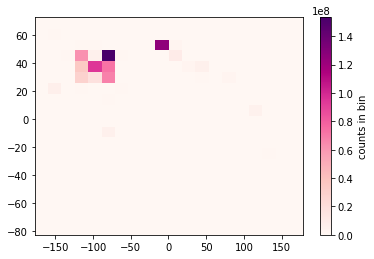

In [33]:
plt.hist2d(ufos['longitude'], ufos['latitude'], weights=ufos['duration_seconds'], bins=20, cmap='RdPu')
cb = plt.colorbar()
cb.set_label('counts in bin')

Note that here I am using the whole UFO dataset again, since we are rebinning anyway.  Feel free to use `ufoDS` if it works better on your computer.

Again, we know that the duration should be log scaled, and we can do that with the `SymLogNorm` color scale in matplotlib if we want:

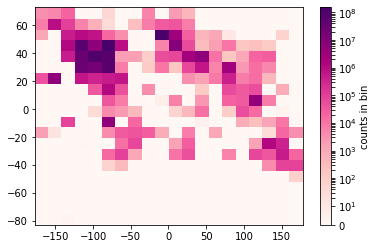

In [34]:
import matplotlib.colors as mpl_colors
plt.hist2d(ufos['longitude'], ufos['latitude'], weights=ufos['duration_seconds'], 
           bins=20, cmap='RdPu', norm = mpl_colors.SymLogNorm(10))
cb = plt.colorbar()
cb.set_label('counts in bin')

Now this is starting to look a bit more like our scatter plot, but we can more easily make out areas of long duration (like in the US).  Ok, we want to incorporate interactivity, so let's use the `bqplot` engine + our ideas of the heatmap marks that we used last time to create our own clickable map.

Let's use `numpy`'s 2d histogram function to do that for us:

In [35]:
# ***START WITH 10 EACH**
nlong = 20 
nlat = 20

#(1)
hist2d, long_edges, lat_edges = np.histogram2d(ufos['longitude'], 
                                               ufos['latitude'], 
                                               weights=ufos['duration_seconds'], 
                                              bins=[nlong,nlat])

# this returns the TOTAL duration of ufo events in each bin
# Let's take a quick look at this data
hist2d

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.80000000e+03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 4.70640000e+04, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.20300000e+03, 7.37100000e+03, 3.70000000e+03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.50000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 6.75425400e+06, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 9.63978000e+05, 5.10500000e+03],
       [2.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 8.78160000e+04, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.7449

In [43]:
hist2d.max(), hist2d.min() # a pretty big range!

(153348519.88, 0.0)

Let's take a quick look at this with `imshow` in `matplotlib`:

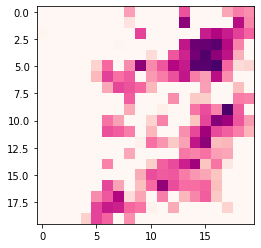

In [36]:
plt.imshow(hist2d, cmap='RdPu', norm = mpl_colors.SymLogNorm(10))

Note that the x/y labels are just the bin indicies.  But even so, we can see that this is rotated to what we want to acutally plot!  

Different methods of histogramming will give you different shaped outputs.  Worse still, depending on what viz engine you're using, it expects different orientations of the data going in!  My suggestion is to experiement and make sure you're data is in the correct orientation by plotting it a few times.

For `bqplot`, we actually want our orientation to be *upsidedown* which we can get by taking the transpose of `hist2d`:

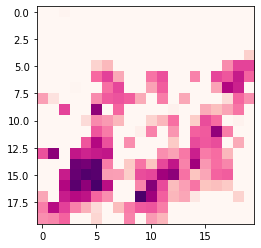

In [42]:
plt.imshow(hist2d.T, cmap='RdPu', norm = mpl_colors.SymLogNorm(10))

Ok, let's make our histogramming more complex.  

As an aside: we want to treat the histogram as a probability instead of a total weighted count:

In [48]:
hist2d, long_edges, lat_edges = np.histogram2d(ufos['longitude'], 
                                               ufos['latitude'], 
                                               weights=ufos['duration_seconds'],
                                              density=True, 
                                              bins = [nlong,nlat])
hist2d.max(), hist2d.min()

(0.0015329854771788194, 0.0)

What are the shapes of the different outputs here?

In [50]:
hist2d.shape, long_edges.shape, lat_edges.shape

((20, 20), (21,), (21,))

Note that the long/lat edges have 1 more count than the histogram size.  This is because they are indeed edges.  To get bin centers, which is what we want to do for plotting we can do:

In [53]:
long_centers = (long_edges[:-1] + long_edges[1:]) / 2
long_centers

array([-167.78055671, -150.02555893, -132.27056115, -114.51556337,
        -96.76056559,  -79.00556781,  -61.25057003,  -43.49557225,
        -25.74057447,   -7.98557669,    9.76942109,   27.52441887,
         45.27941665,   63.03441443,   80.78941221,   98.54440999,
        116.29940777,  134.05440555,  151.80940333,  169.56440111])

In [55]:
lat_centers = (lat_edges[:-1] + lat_edges[1:]) / 2
lat_centers

array([-78.9736832, -71.1955456, -63.417408 , -55.6392704, -47.8611328,
       -40.0829952, -32.3048576, -24.52672  , -16.7485824,  -8.9704448,
        -1.1923072,   6.5858304,  14.363968 ,  22.1421056,  29.9202432,
        37.6983808,  45.4765184,  53.254656 ,  61.0327936,  68.8109312])

We might want to control where our bins are, we can do this by specifying bin edges ourselves:

In [57]:
long_bins = np.linspace(-150, 150, nlong+1)
lat_bins = np.linspace(-40, 70, nlat+1)
print(long_bins, long_bins.shape)
print(lat_bins, lat_bins.shape)

[-150. -135. -120. -105.  -90.  -75.  -60.  -45.  -30.  -15.    0.   15.
   30.   45.   60.   75.   90.  105.  120.  135.  150.] (21,)
[-40.  -34.5 -29.  -23.5 -18.  -12.5  -7.   -1.5   4.    9.5  15.   20.5
  26.   31.5  37.   42.5  48.   53.5  59.   64.5  70. ] (21,)


Let's take these bins as our inputs and regenerate our histogram:

In [70]:
hist2d, long_edges, lat_edges = np.histogram2d(ufos['longitude'], 
                                               ufos['latitude'], 
                                               weights=ufos['duration_seconds'],
                                              bins = [long_bins,lat_bins])

And grab our centers of lat and long for plotting as well:

In [71]:
long_centers = (long_edges[:-1] + long_edges[1:]) / 2
lat_centers = (lat_edges[:-1] + lat_edges[1:]) / 2

We know that we want to input this into `bqplot`'s grid heatmap, so we need to take the transpose:

In [72]:
hist2d = hist2d.T

What is the range of values in our plot?

In [73]:
hist2d.min(), hist2d.max(), hist2d[hist2d>0].min() # this is the *total duration* of sitings in a bin

(0.0, 125056847.51, 1.0)

We still have a big range in count values because we weighted by the non-log duration above.  So we'll instead take the log of our output histogram.

For aesthetic value, we want to have areas where there are no counts (like the ocean) show up as zero.  We can do that by a little trick -- setting the 0 values to `NaN`.  We will then take the log for color scaling:

In [74]:
np.log10(hist2d).min()

/Users/jillnaiman/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


-inf

The above gives us an error which can mess up our color maps.  So we act tricky:

In [75]:
hist2d[hist2d <= 0] = np.nan # set zeros to NaNs
# then take log
hist2d = np.log10(hist2d)
#hist2d[0:10]

Now that we have all that fancy binning out of the way, lets proceed as normal:

In [76]:
# (1) add scales - colors, x & y
col_sc = bqplot.ColorScale(scheme="RdPu", 
                           min=np.nanmin(hist2d), 
                           max=np.nanmax(hist2d))
x_sc = bqplot.LinearScale()
y_sc = bqplot.LinearScale()

# (2) create axis - for colors, x & y
c_ax = bqplot.ColorAxis(scale = col_sc, 
                        orientation = 'vertical', 
                        side = 'right')

x_ax = bqplot.Axis(scale = x_sc, label='Longitude')
y_ax = bqplot.Axis(scale = y_sc, 
                   orientation = 'vertical', 
                   label = 'Latitude')

# (3) Marks
heat_map = bqplot.GridHeatMap(color = hist2d,
                              row = lat_centers, 
                              column = long_centers,
                              scales = {'color': col_sc,
                                        'row': y_sc,
                                        'column': x_sc},
                              interactions = {'click': 'select'},
                              anchor_style = {'fill':'blue'}, 
                              selected_style = {'opacity': 1.0},
                              unselected_style = {'opacity': 1.0})

# (4) interactivity - none yet

# (5) put it all together in a figure
fig = bqplot.Figure(marks = [heat_map], axes = [c_ax, y_ax, x_ax])
fig

Figure(axes=[ColorAxis(orientation='vertical', scale=ColorScale(max=8.09710747658943, min=0.0, scheme='RdPu'),…

Let's start building up our dashboard like before.  One easy thing we can do is add a label:

In [94]:
# (1) add scales - colors, x & y
col_sc = bqplot.ColorScale(scheme="RdPu", 
                           min=np.nanmin(hist2d), 
                           max=np.nanmax(hist2d))
x_sc = bqplot.LinearScale()
y_sc = bqplot.LinearScale()

# (2) create axis - for colors, x & y
c_ax = bqplot.ColorAxis(scale = col_sc, 
                        orientation = 'vertical', 
                        side = 'right')

x_ax = bqplot.Axis(scale = x_sc, label='Longitude')
y_ax = bqplot.Axis(scale = y_sc, 
                   orientation = 'vertical', 
                   label = 'Latitude')

# (3) Marks
heat_map = bqplot.GridHeatMap(color = hist2d,
                              row = lat_centers, 
                              column = long_centers,
                              scales = {'color': col_sc,
                                        'row': y_sc,
                                        'column': x_sc},
                              interactions = {'click': 'select'},
                              anchor_style = {'fill':'blue'}, 
                              selected_style = {'opacity': 1.0},
                              unselected_style = {'opacity': 1.0})

# (4) interactivity - label
mySelectedLabel = ipywidgets.Label()
def get_data_value(change):
    if len(change['owner'].selected) == 1: #only 1 selected
        i,j = change['owner'].selected[0]
        v = hist2d[i,j] # grab data value
        mySelectedLabel.value = 'Total duration in log(sec) = ' + str(v) # set our label
    
# make sure we check out     
heat_map.observe(get_data_value, 'selected')


# (5) put it all together in a figure
fig = bqplot.Figure(marks = [heat_map], axes = [c_ax, y_ax, x_ax])
myDashboard = ipywidgets.VBox([mySelectedLabel,fig])
myDashboard

Let's also include information about the duration as a function of date in a particular bin on another plot -- a scatter plot this time.  Let's first start by making this plot alone before putting it into our dashboard.

In [83]:
import datetime as dt # we'll use this to format our dates all fancy like

#1: Now let's make our scales.  We'll start with a new `bqplot` scale called `DateScale`:

In [84]:
x_scl = bqplot.DateScale(min=dt.datetime(1950,1,1),max=dt.datetime(2020,1,1)) # note: for dates on x-axis

Let's plot the duration on a log scale since we know that's probably what will look best based on the range of durations:

In [85]:
y_scl = bqplot.LogScale()

#2: Our axis:

In [86]:
ax_xcl = bqplot.Axis(label='Date', scale=x_scl)
ax_ycl = bqplot.Axis(label='Duration in Sec', scale=y_scl, 
                    orientation='vertical', side='left')

#3: our marks, in this case a scatter plot

Thinking ahead, we know that we want to select a 2d bin from our heatmap to then draw scatters for our scatter plot.  Let's write things in this way:

In [96]:
i,j = 19,0 # picking an x/y bin -- this is one I know has a lot of data!

Let's specify the range of longs & lats for this selection of x/y bin:

In [97]:
longs = [long_edges[j], long_edges[j+1]] # min/max longitude
lats = [lat_edges[i],lat_edges[i+1]] # min/max latitude

Let's mask out a subset of the UFO dataset with *only* these ranges of longitude and latitude:

In [98]:
region_mask = ( (ufos['latitude'] >= lats[0]) & (ufos['latitude']<=lats[1]) &\
                (ufos['longitude'] >= longs[0]) & (ufos['longitude']<=longs[1]) )

# we can see this selects for the upper right point of our heatmap
lats, longs, ufos['latitude'][region_mask]

([64.5, 70.0], [-150.0, -135.0], 327      64.837778
 2845     64.837778
 3620     64.837778
 4602     64.751111
 6011     64.837778
            ...    
 77347    64.751111
 77497    64.837778
 78571    64.837778
 79029    64.837778
 79470    64.837778
 Name: latitude, Length: 74, dtype: float64)

We won't add any interactivity to this plot -- the interactivity will be drawn from our heatmap, so all that is left to do is add in marks:

#4: Marks

In [99]:
# lets plot the durations as a function of year there
duration_scatt = bqplot.Scatter(x = ufos['date'][region_mask],
                               y = ufos['duration_seconds'][region_mask], 
                              scales={'x':x_scl, 'y':y_scl})

#5: Put it all together and take a look!

In [100]:
fig_dur = bqplot.Figure(marks = [duration_scatt], axes = [ax_xcl, ax_ycl])
fig_dur

Figure(axes=[Axis(label='Date', scale=DateScale(max=datetime.datetime(2020, 1, 1, 0, 0), min=datetime.datetime…

### Scatter plot + label driven by heatmap dashboard

Let's put together our heatmap + label + scatter plot as a dashboard.  I'll recopy what we had before into some cells we can put together:

In [104]:
# (I) CREATE LABEL
mySelectedLabel = ipywidgets.Label()

In [105]:
# (II) HEAT MAP

# (1) add scales - colors, x & y
col_sc = bqplot.ColorScale(scheme="RdPu", 
                           min=np.nanmin(hist2d), 
                           max=np.nanmax(hist2d))
x_sc = bqplot.LinearScale()
y_sc = bqplot.LinearScale()

# (2) create axis - for colors, x & y
c_ax = bqplot.ColorAxis(scale = col_sc, 
                        orientation = 'vertical', 
                        side = 'right')

x_ax = bqplot.Axis(scale = x_sc, label='Longitude')
y_ax = bqplot.Axis(scale = y_sc, 
                   orientation = 'vertical', 
                   label = 'Latitude')

# (3) Marks
heat_map = bqplot.GridHeatMap(color = hist2d,
                              row = lat_centers, 
                              column = long_centers,
                              scales = {'color': col_sc,
                                        'row': y_sc,
                                        'column': x_sc},
                              interactions = {'click': 'select'},
                              anchor_style = {'fill':'blue'}, 
                              selected_style = {'opacity': 1.0},
                              unselected_style = {'opacity': 1.0})

# skipping 4 & 5 for now

In [106]:
# (III) SCATTER PLOT

# (1) scales
x_scl = bqplot.DateScale(min=dt.datetime(1950,1,1),max=dt.datetime(2020,1,1)) # note: for dates on x-axis
y_scl = bqplot.LogScale()

# (2) Axis
ax_xcl = bqplot.Axis(label='Date', scale=x_scl)
ax_ycl = bqplot.Axis(label='Duration in Sec', scale=y_scl, 
                    orientation='vertical', side='left')

# (3) Marks
# NOTE: we'll start with some default value selected
i,j = 19,0 # picking an x/y bin -- this is one I know has a lot of data!
longs = [long_edges[j], long_edges[j+1]] # min/max longitude
lats = [lat_edges[i],lat_edges[i+1]] # min/max latitude
# lets plot the durations as a function of year there
duration_scatt = bqplot.Scatter(x = ufos['date'][region_mask],
                               y = ufos['duration_seconds'][region_mask], 
                              scales={'x':x_scl, 'y':y_scl})

# skipping 4 & 5 for now

In [107]:
# (IV) LINKING TOGETHER DASHBOARD WITH INTERACTIVITY

def get_data_value(change):
    if len(change['owner'].selected) == 1: #only 1 selected
        i,j = change['owner'].selected[0]
        v = hist2d[i,j] # grab data value
        mySelectedLabel.value = 'Total duration in log(sec) = ' + str(v) # set our label
        # now: for the scatter plot
        longs = [long_edges[j], long_edges[j+1]]
        lats = [lat_edges[i],lat_edges[i+1]]
        region_mask = ( (ufos['latitude'] >= lats[0]) & (ufos['latitude']<=lats[1]) &\
                    (ufos['longitude'] >= longs[0]) & (ufos['longitude']<=longs[1]) )
        duration_scatt.x = ufos['date'][region_mask]
        duration_scatt.y = ufos['duration_seconds'][region_mask]

heat_map.observe(get_data_value, 'selected')

In [108]:
# (5) create figures
fig_heatmap = bqplot.Figure(marks = [heat_map], axes = [c_ax, y_ax, x_ax])
fig_dur = bqplot.Figure(marks = [duration_scatt], axes = [ax_xcl, ax_ycl])

In [110]:
# since we know from last time we wanna make our figs a bit bigger:
fig_heatmap.layout.min_width='500px'
fig_dur.layout.min_width='500px'

myDashboard = ipywidgets.VBox([mySelectedLabel, ipywidgets.HBox([fig_heatmap,fig_dur])])
myDashboard

Note that when I select a deep purple place, my scatter plot is very laggy, this makes me think we should do this with a histogram/bar type plot.  So let's try that below:

In [31]:
# (I) For the heatmap
# add scales - colors, x & y
col_sc = bqplot.ColorScale(scheme="RdPu", 
                           min=np.nanmin(hist2d), 
                           max=np.nanmax(hist2d))
x_sc = bqplot.OrdinalScale()
y_sc = bqplot.OrdinalScale()

# create axis - for colors, x & y
c_ax = bqplot.ColorAxis(scale = col_sc, 
                        orientation = 'vertical', 
                        side = 'right')
x_ax = bqplot.Axis(scale = x_sc, label='Longitude')
y_ax = bqplot.Axis(scale = y_sc, 
                   orientation = 'vertical', 
                   label = 'Latitude')

heat_map = bqplot.GridHeatMap(color = hist2d,
                              row = lat_centers, 
                              column = long_centers,
                              scales = {'color': col_sc,
                                        'row': y_sc,
                                        'column': x_sc},
                              interactions = {'click': 'select'},
                              anchor_style = {'fill':'blue'}, 
                              selected_style = {'opacity': 1.0},
                              unselected_style = {'opacity': 1.0})

fig = bqplot.Figure(marks = [heat_map], axes = [c_ax, y_ax, x_ax])

# (II) Bar plot
# scales & ax in usual way
x_scl = bqplot.LinearScale() # note we are back to linears
y_scl = bqplot.LinearScale()
ax_xcl = bqplot.Axis(label='Date', scale=x_scl)
ax_ycl = bqplot.Axis(label='Total duration in Sec', scale=y_scl, 
                    orientation='vertical', side='left')
# for the lineplot of duration in a region as a function of year
# lets start with a default region & year
i,j = 0,0
longs = [long_edges[i], long_edges[i+1]]
lats = [lat_edges[j],lat_edges[j+1]]
region_mask = ( (ufos['latitude'] >= lats[0]) & (ufos['latitude']<=lats[1]) &\
                (ufos['longitude'] >= longs[0]) & (ufos['longitude']<=longs[1]) )

# we can see this selects for the upper right point of our heatmap
lats, longs, ufos['latitude'][region_mask]

# lets plot the durations as a function of year there
ufos['year'] = ufos['date'].dt.year
dur, dur_edges = np.histogram(ufos['year'][region_mask],
                              weights=ufos['duration_seconds'][region_mask],
                              bins=10)
# like before with our histograms
dur_centers = [(dur_edges[i]+dur_edges[i+1])*0.5 for i in range(len(dur_edges)-1)]
# make histogram by hand, weighting by duration
duration_hist = bqplot.Bars(x=dur_centers, y=dur, 
                          scales={'x':x_scl, 'y':y_scl})
fig_dur = bqplot.Figure(marks = [duration_hist], axes = [ax_xcl, ax_ycl])


#  to what we've selected so:
def get_data_value(change):
    i,j = change['owner'].selected[0]
    v = hist2d[i,j] # grab data value
    mySelectedLabel.value = 'Total duration in log(sec) = ' + str(v) # set our label
    # note!! i & j are swapped here to machup with hist & selection 
    longs = [long_edges[j], long_edges[j+1]]
    lats = [lat_edges[i],lat_edges[i+1]]
    region_mask = ( (ufos['latitude'] >= lats[0]) & (ufos['latitude']<=lats[1]) &\
                (ufos['longitude'] >= longs[0]) & (ufos['longitude']<=longs[1]) )
    if len(ufos['year'][region_mask]) > 0:
        dur, dur_edges = np.histogram(ufos['year'][region_mask],
                                      weights=ufos['duration_seconds'][region_mask],
                                      bins=10)
        dur_centers = [(dur_edges[i]+dur_edges[i+1])*0.5 for i in range(len(dur_edges)-1)]
        duration_hist.x = dur_centers
        duration_hist.y = dur
    #else:
    #    duration_hist.x = np.arange(10); duration_hist.y = np.zeros(10)
# make sure we connect to heatmap     
heat_map.observe(get_data_value, 'selected')

fig.layout.min_width = '500px'
fig_dur.layout.min_width = '700px'
plots = ipywidgets.HBox([fig,fig_dur])
myout = ipywidgets.VBox([mySelectedLabel, plots])
myout